<a href="https://colab.research.google.com/github/Gus-1003/ENEM_2021-Data_analysis/blob/main/An%C3%A1lise_Geral_Microdados_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto da Pesquisa:

## Objetivo:


> Analisar o padrão de resposta dos candidatos do ENEM 2021 e divulgar, de acordo com os fundamentos da Ciências dos Dados, métricas utilizadas pela Teoria de Resposta Item para cada questão do exame relacionando com dados populacionais.


## Metodologia:

> Processamento do banco de dados que contêm as respostas dos alunos para cada questão com ferramentas de Extração-Transformação-Carga (ETL, em inglês). Utilização de estatística descritiva para descrever as características de cada questão e da população em estudo. Utilização de estatística inferencial por métodos não-supervisionados (análise de cluster e PCA) para indicar casos de correspondência e correlação entre índice de acerto das questões e as variáveis populacionais.

# Ciclo de Vida dos Dados:

## Coleta de dados:

> Essa fase envolve a obtenção de dados brutos de várias fontes, como arquivos, bancos de dados, dispositivos IoT ou sensores.

## Pré-processamento:
> Nesta fase, os dados brutos são limpos, organizados e preparados para análise. Isso pode incluir a remoção de valores ausentes ou inconsistentes, a normalização de dados e a seleção de características relevantes.

## Exploração de dados:
> Nesta fase, os dados são analisados para entender padrões, tendências e correlações. Isso envolve a visualização de dados e a execução de análises estatísticas.

## Modelagem:
> Nesta fase, são criados modelos matemáticos ou estatísticos para prever ou classificar os dados. Isso pode incluir técnicas como regressão, árvores de decisão ou redes neurais.

## Avaliação:
> Nesta fase, os modelos criados são avaliados quanto à precisão e eficácia. Isso envolve o teste do modelo em dados separados para medir a precisão e ajustar o modelo conforme necessário.

# Análise Geral_Microdados_Enem

## Import de libs e ferramentas:

Antes de começar a análise exploratória, é necessário importar as bibliotecas necessárias, como pandas, numpy e matplotlib, por exemplo:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

No meu caso eu faço uso da nuvem do google drive para armazenar as informções do banco "Microdados - Enem". Porem quem tiver interesse pode encontrolo no Link:
* https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


## 1. Pré - Processamento:

Exploração de dados, também conhecida como análise exploratória de dados, é um processo utilizado na área de ciência de dados para descobrir padrões, tendências e informações valiosas em um conjunto de dados. A exploração de dados envolve a aplicação de técnicas estatísticas e de visualização de dados para obter insights que possam ser utilizados para tomar decisões de negócios ou resolver problemas em diversas áreas, desde finanças e marketing até saúde e ciência.

O processo de exploração de dados envolve diversas etapas, como a limpeza e pré-processamento dos dados, a identificação de padrões e tendências, a visualização dos dados em gráficos e tabelas, e a realização de testes estatísticos para validar hipóteses e encontrar relações entre variáveis.

A exploração de dados é uma das principais etapas do processo de análise de dados, sendo fundamental para a descoberta de informações valiosas e insights que podem ser utilizados para melhorar processos e tomar decisões mais informadas.

In [3]:
"""Para carregar os dados em Python, você pode usar a função read_csv() do pandas para carregar dados de um arquivo CSV, 
ou outras funções semelhantes para carregar dados de outros tipos de arquivos:"""

dados = pd.read_csv('/content/drive/MyDrive/Pesquisa_Enem2021/Base de Dados/MICRODADOS_ENEM_2021.csv', encoding='latin-1', delimiter=";", quotechar='"')

### Visualização dos dados:

In [4]:
'''O comando "display(df)" é utilizado na biblioteca pandas do Python para exibir um DataFrame na saída. 
Ele é útil para visualizar os dados de maneira mais organizada e legível.
o comando exibe as primeiras e últimas linhas do DataFrame, além de algumas informações básicas, 
como o número de linhas e colunas, nomes de colunas e tipo de dados de cada coluna.'''

display(dados)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B


Visualizando: Assim que compilamos o comando "display()", conseguimos extrair algumas informações sobre a composição do dataset "ENEM 2021":

* 3.389.832 linhas = Quantidade de participantes da prova;
* 76 atributos / características = dados referentes a esses alunos e ao exame;
* De primeira, já podemos observar a presença da coluna "NU_INSCRICAO", que normalmente não possui utilidade para análise e, portanto, será apagada posteriormente.
* Antes mesmo de uma busca aprofundada, já conseguimos identificar a presença de valores NaN no dataset - presentes na última amostra. Isso já gera uma hipótese de haver mais dados comprometidos, fazendo-se necessário um processo de limpeza desses valores.

In [5]:
'''O comando "df.head()" é utilizado na biblioteca pandas do Python para exibir as primeiras linhas de um DataFrame. Por padrão, 
o método "head()" exibe as 5 primeiras linhas do DataFrame, mas é possível passar um argumento inteiro para o método para especificar 
o número de linhas que deseja exibir.'''

dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [6]:
'''O comando "df.info()" é utilizado na biblioteca pandas do Python para exibir informações sobre um DataFrame, como o número de linhas e colunas, 
o nome e tipo de cada coluna, a quantidade de valores não nulos e o tipo de objeto do DataFrame.'''

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

Visualizando: Assim que compilamos o comando "dados.info()", conseguimos extrair algumas informações sobre a composição do dataset "ENEM 2021":

* Podemos identificar que dos 76 atributos originais, 39 são numéricos e 37 são nominais (textuais);
* Entre os numéricos: 17 são inteiros (variáveis discretas) e 22 são flutuantes / decimais (variáveis contínuas).
> **Lembrando que nem sempre os valores numéricos representam o real valor de uma coluna (como, por exemplo, 1 para estado civil). Provavelmente várias dessas colunas atualmente numéricas estão usando esses valores como códigos para uma opção de resposta.**

In [43]:
'''Ao executar "df.describe()", serão exibidas as estatísticas descritivas das colunas numéricas do DataFrame "dados", 
incluindo o número de valores não nulos, a média, o desvio padrão, o valor mínimo, o quartil 25%, o quartil 50% (mediana), 
o quartil 75% e o valor máximo. Esse comando é útil para entender a distribuição dos dados e detectar valores extremos 
ou anomalias nos dados.'''

#dados.describe()

'\nAo executar "df.describe()", serão exibidas as estatísticas descritivas das colunas numéricas do DataFrame "dados", \nincluindo o número de valores não nulos, a média, o desvio padrão, o valor mínimo, o quartil 25%, o quartil 50% (mediana), \no quartil 75% e o valor máximo. Esse comando é útil para entender a distribuição dos dados e detectar valores extremos \nou anomalias nos dados.\n'

**Informação sobre o comando "describe()":**

> É importante lembrar que o parâmetro "include" presente no método "describe()" pode ser configurado para gerar estatísticas descritivas apenas para um tipo específico de colunas do dataframe. Como "include='all'" para gerar estatísticas descritivas para todas as colunas, independentemente do tipo de dados, ou "include=['int', 'float', 'object']" para tipos específicos de valores.



**Informação sobre "quartis" presente nos resultados do comando "describe()":**

> O comando "describe()" é usado para gerar uma breve estatística descritiva do conjunto de dados. Os quartis são uma parte dessa estatística descritiva e representam a divisão dos dados em quartos iguais.

> Existem três quartis que dividem os dados em quatro partes iguais, com 25% dos dados em cada parte:

* O primeiro quartil (Q1) é o valor abaixo do qual está 25% dos dados.
* O segundo quartil (Q2) é o valor abaixo do qual está 50% dos dados. Este valor é equivalente à mediana.
* O terceiro quartil (Q3) é o valor abaixo do qual está 75% dos dados.

> A partir desses valores, pode-se calcular o intervalo interquartil (IQR) como a diferença entre o terceiro e o primeiro quartil, que representa a variação central dos dados.

In [44]:
dados.describe(include='int')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.289710e-01,3.104218e+06,3.089625e+01,6.633786e-01,7.040145e-01,7.040145e-01,6.633786e-01,4.704640e-01
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,3.351679e-01,1.011035e+06,1.008222e+01,4.734579e-01,4.590982e-01,4.590982e-01,4.734579e-01,4.991269e-01
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100015e+06,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.408003e+06,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.122306e+06,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,3.550308e+06,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,1.000000e+00,5.300108e+06,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00


In [42]:
dados.describe(include='float')

,TP_ENSINO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,...,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.096828e+06,8.138060e+05,813806.000000,813806.000000,813806.000000,813806.000000,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,...,2.378379e+06,2.245844e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,3.389830e+06
mean,1.006295e+00,3.182762e+06,31.681298,2.469393,1.034867,1.015533,9.160518e+02,8.867477e+02,8.966545e+02,9.061433e+02,...,5.025556e+02,5.350802e+02,1.140684e+00,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02,3.739557e+00
std,7.909361e-02,1.041348e+06,10.387891,0.939162,0.183443,0.197323,2.586309e+01,2.788652e+01,2.751352e+01,2.621196e+01,...,7.916405e+01,1.106267e+02,7.910804e-01,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02,1.378942e+00
min,1.000000e+00,1.100015e+06,11.000000,1.000000,1.000000,1.000000,9.090000e+02,8.790000e+02,8.890000e+02,8.990000e+02,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2.312908e+06,23.000000,2.000000,1.000000,1.000000,9.100000e+02,8.800000e+02,8.900000e+02,9.000000e+02,...,4.476000e+02,4.447000e+02,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,1.000000e+00,3.170107e+06,31.000000,2.000000,1.000000,1.000000,9.110000e+02,8.810000e+02,8.910000e+02,9.010000e+02,...,5.059000e+02,5.154000e+02,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02,4.000000e+00
75%,1.000000e+00,3.550308e+06,35.000000,4.000000,1.000000,1.000000,9.120000e+02,8.820000e+02,8.920000e+02,9.020000e+02,...,5.588000e+02,6.139000e+02,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2.000000e+00,5.300108e+06,53.000000,4.000000,2.000000,4.000000,1.048000e+03,1.018000e+03,1.028000e+03,1.038000e+03,...,8.261000e+02,9.531000e+02,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


In [8]:
dados.describe(include='object')

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,3389832,813806,813806,3389832,3389832,2245844,2378379,2378379,2245844,2245844,...,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830
unique,2,5271,27,1712,27,2244621,2371495,2375813,2244141,8,...,5,5,2,5,2,2,5,2,5,2
top,F,São Paulo,SP,São Paulo,SP,.............................................,.............................................,.....99999.......................................,.............................................,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,...,B,A,A,B,A,A,D,A,A,B
freq,2090526,37692,139473,141840,509954,393,4632,1297,453,550219,...,1698583,3282971,2579763,2217847,2733449,2642067,1002077,2865104,1436524,3037632


**Visualizando: focando no comando "dados.describe(include='object')", conseguimos extrair algumas informações sobre a composição do dataset "ENEM 2021":**

* Podemos identificar que dos 3.389.832 cadidatos do exame, 2.090.526 são mulheres. Demonstrando um desejo do publico feminino pelo ensino superior no Brasil;
* A cidade de São Paulo, como polo economico do Brasileiro, possui a maior quantidade de pontos de realização do exame e a maior quantidade de participante.

> ***Hipoteses:*** O numero massivo de participantes e pontos de exame em um mesmo municipio pode tornar o nivel de educação exigido para entrar no ensino superior altissimo. O que pode acabar excluindo desse processo os alunos que não possuem condições sociais-financeiras que não puderam pagar uma educação de nivel mais elevado. No entanto, é importante lembrar que a exclusão desses alunos não é necessariamente uma regra e que existem políticas públicas e programas sociais que visam tornar o acesso à educação mais equitativo e inclusivo em todo o país.

**Informações sobre técnicas de nomeclatura de váriaveis:**

* Em programação, é uma boa prática nomear as variáveis com letras minúsculas.

Porém podemos utilizar algumas tecnicas no caso de variaveis que são compostas por mais de um nome como: 

> A técnica ***camelCase*** é um padrão de nomenclatura de variáveis que consiste em escrever as palavras compostas ou frases juntas, eliminando espaços ou pontuações e capitalizando a primeira letra de cada palavra, exceto a primeira palavra. Por exemplo, se quisermos criar uma variável para armazenar o nome completo de uma pessoa, podemos usar a convenção camelCase e escrever "nomeCompleto" ou "nomeCompletoPessoa".

> A técnica ***snake_case***, na qual as palavras são separadas por um sublinhado "_". Por exemplo, uma variável pode ser nomeada como "numero_de_alunos". É uma convenção de nomenclatura amplamente usada em Python e em outras linguagens de programação.

### Variância dos atributos Numéricos:

In [48]:
# calcule a variância de cada coluna numérica do DataFrame
variancia_colunas = dados.var(numeric_only=True)

print(variancia_colunas)

NU_INSCRICAO              9.924946e+11
NU_ANO                    0.000000e+00
TP_FAIXA_ETARIA           1.523240e+01
TP_ESTADO_CIVIL           1.705206e-01
TP_COR_RACA               1.045631e+00
TP_NACIONALIDADE          4.199602e-02
TP_ST_CONCLUSAO           5.181560e-01
TP_ANO_CONCLUIU           1.830754e+01
TP_ESCOLA                 3.526525e-01
TP_ENSINO                 6.255800e-03
IN_TREINEIRO              1.123375e-01
CO_MUNICIPIO_ESC          1.084405e+12
CO_UF_ESC                 1.079083e+02
TP_DEPENDENCIA_ADM_ESC    8.820260e-01
TP_LOCALIZACAO_ESC        3.365136e-02
TP_SIT_FUNC_ESC           3.893641e-02
CO_MUNICIPIO_PROVA        1.022192e+12
CO_UF_PROVA               1.016512e+02
TP_PRESENCA_CN            2.241624e-01
TP_PRESENCA_CH            2.107712e-01
TP_PRESENCA_LC            2.107712e-01
TP_PRESENCA_MT            2.241624e-01
CO_PROVA_CN               6.688995e+02
CO_PROVA_CH               7.776581e+02
CO_PROVA_LC               7.569940e+02
CO_PROVA_MT              

In [50]:
# Selecione apenas as colunas numéricas do DataFrame
colunas_numericas = dados.select_dtypes(include=['float64', 'int64'])

# Calcule a variância de cada coluna numérica e encontre o índice (ou nome) da coluna com a maior variância
coluna_maior_variancia = colunas_numericas.var().idxmax()

print("A coluna numérica com a maior variância é:", coluna_maior_variancia)

A coluna numérica com a maior variância é: CO_MUNICIPIO_ESC


### Limpeza dos valores corrompidos (NaN):

In [56]:
# Esse código retorna a contagem de valores nulos em cada coluna do DataFrame dados, ordenando do menor para o maior número de valores nulos.
dados.isna().sum().sort_values()

NU_INSCRICAO              0
TP_LINGUA                 0
TP_PRESENCA_MT            0
TP_PRESENCA_LC            0
TP_PRESENCA_CH            0
                     ...   
SG_UF_ESC           2576026
CO_UF_ESC           2576026
NO_MUNICIPIO_ESC    2576026
CO_MUNICIPIO_ESC    2576026
TP_SIT_FUNC_ESC     2576026
Length: 76, dtype: int64

In [75]:
'''O comando dados.dropna() é utilizado para remover as linhas com valores faltantes (NaN) do DataFrame dados. 
O resultado da operação é armazenado na variável dados_sem_nulos.'''

# dados_sem_nulos = dados.drop(dados.isna().sum().idxmax(), axis=1) #Vai exigir que seja rodado varias vezes

# contagem dos valores NaN por coluna
nulos = dados.isnull().sum()

# seleciona as colunas com mais de 1.500.000 valores NaN
colunas_remover = nulos[nulos > 1500000].index

# remove as colunas selecionadas
dados_sem_nulos = dados.drop(columns=colunas_remover)

**Informação:**

> Ao remover linhas com NaN o dataset dados se reduziu a 592.189 amostras, quase 6x menor que o numero original de 3.389.832;

* Graças a isso eu optei por usar um comando que revome as "colunas com maior quantidade de NaN";

In [76]:
dados_sem_nulos.isna().sum().sort_values()

NU_INSCRICAO             0
TP_PRESENCA_MT           0
TP_PRESENCA_LC           0
TP_PRESENCA_CH           0
TP_PRESENCA_CN           0
                    ...   
TX_RESPOSTAS_CN    1143988
NU_NOTA_MT         1143988
NU_NOTA_CN         1143988
CO_PROVA_MT        1143988
CO_PROVA_CN        1143988
Length: 68, dtype: int64

In [78]:
'''
O comando shape() é utilizado para verificar a dimensão (número de linhas e colunas) de um DataFrame ou de um array no Python. 
A sintaxe para utilizar esse comando é bem simples.

Esse comando irá retornar uma tupla com o número de linhas e colunas do DataFrame. Por exemplo, se o comando retornar (1000, 5), 
isso significa que o DataFrame possui 1000 linhas e 5 colunas.
'''

dados_sem_nulos.shape

(3389832, 68)

In [79]:
display(dados_sem_nulos)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B


In [80]:
dados_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 68 columns):
 #   Column              Dtype  
---  ------              -----  
 0   NU_INSCRICAO        int64  
 1   NU_ANO              int64  
 2   TP_FAIXA_ETARIA     int64  
 3   TP_SEXO             object 
 4   TP_ESTADO_CIVIL     int64  
 5   TP_COR_RACA         int64  
 6   TP_NACIONALIDADE    int64  
 7   TP_ST_CONCLUSAO     int64  
 8   TP_ANO_CONCLUIU     int64  
 9   TP_ESCOLA           int64  
 10  IN_TREINEIRO        int64  
 11  CO_MUNICIPIO_PROVA  int64  
 12  NO_MUNICIPIO_PROVA  object 
 13  CO_UF_PROVA         int64  
 14  SG_UF_PROVA         object 
 15  TP_PRESENCA_CN      int64  
 16  TP_PRESENCA_CH      int64  
 17  TP_PRESENCA_LC      int64  
 18  TP_PRESENCA_MT      int64  
 19  CO_PROVA_CN         float64
 20  CO_PROVA_CH         float64
 21  CO_PROVA_LC         float64
 22  CO_PROVA_MT         float64
 23  NU_NOTA_CN          float64
 24  NU_NOTA_CH          floa

### Separação dos grupos de atributos:

In [81]:
'''
A notação iloc permite fazer indexação baseada em posição (índices inteiros). Portanto, [:, 2:11] 
significa "selecione todas as linhas (:) e as colunas de 2 a 10 (coluna 0, coluna 1, ..., coluna 10)".

Em outras palavras, esse comando retorna um novo DataFrame com as mesmas linhas do dados, mas apenas as 11 primeiras colunas (0 a 10).
'''
info_candidato = dados_sem_nulos.iloc[:,2:11]
# info_exame = dados_sem_nulos.iloc[:,11:36]
# info_redação = dados_sem_nulos.iloc[:,36:43]
# info_quest_social = dados_sem_nulos.iloc[:,43:67]

In [82]:
'''
Este comando seleciona as colunas 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 
'CO_PROVA_CN', 'NU_NOTA_CN' e 'TX_RESPOSTAS_CN' do DataFrame 'dados' e as atribui a uma nova variável chamada 'nature_quest'.
'''
#nature_quest = dados[['TP_SEXO','TP_COR_RACA','TP_ESCOLA','NO_MUNICIPIO_PROVA','SG_UF_PROVA','TP_PRESENCA_CN', 'CO_PROVA_CN','NU_NOTA_CN','TX_RESPOSTAS_CN']]

"\nEste comando seleciona as colunas 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', \n'CO_PROVA_CN', 'NU_NOTA_CN' e 'TX_RESPOSTAS_CN' do DataFrame 'dados' e as atribui a uma nova variável chamada 'nature_quest'.\n"

### Trabalhando com os dados dos candidatos:

In [83]:
info_candidato.isna().sum() # Esse comando retorna a quantidade de valores NaN (Not a Number) em cada coluna do DataFrame infoCandidato..isna().sum() # Esse comando retorna a quantidade de valores NaN (Not a Number) em cada coluna do DataFrame infoCandidato.

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
IN_TREINEIRO        0
dtype: int64

In [66]:
display(info_candidato)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0
33,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0
45,210052916275,2021,4,F,1,3,1,2,0,2,1.0,0
51,210051417174,2021,3,M,1,3,1,2,0,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3387074,210053404116,2021,3,F,1,3,1,2,0,2,1.0,0
3387928,210053232577,2021,3,F,1,3,1,2,0,2,1.0,0
3389073,210051724712,2021,3,M,1,3,1,2,0,2,1.0,0
3389288,210052134860,2021,3,F,0,2,1,2,0,2,1.0,0


In [85]:
info_candidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   TP_FAIXA_ETARIA   int64 
 1   TP_SEXO           object
 2   TP_ESTADO_CIVIL   int64 
 3   TP_COR_RACA       int64 
 4   TP_NACIONALIDADE  int64 
 5   TP_ST_CONCLUSAO   int64 
 6   TP_ANO_CONCLUIU   int64 
 7   TP_ESCOLA         int64 
 8   IN_TREINEIRO      int64 
dtypes: int64(8), object(1)
memory usage: 232.8+ MB


In [84]:
info_candidato.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO
count,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06
mean,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.289710e-01
std,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,3.351679e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
max,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,1.000000e+00


## Exploração dos Dados:

### Analisando as Notas Grais:

In [86]:
dados['NU_NOTA_CN'] = dados['NU_NOTA_CN'].astype(float)

In [87]:
dados['NU_NOTA_CN'].mean()

491.7856752294459

In [88]:
dados['NU_NOTA_CN'].std()

80.56675679752138

In [89]:
variancia = np.var(dados['TP_COR_RACA'])
variancia

1.0456309517179945

### Candidatos:

<Axes: ylabel='TP_FAIXA_ETARIA'>

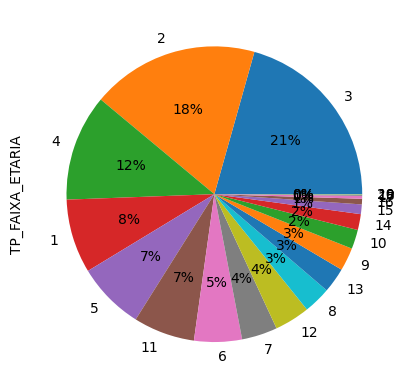

In [90]:
info_candidato['TP_FAIXA_ETARIA'].value_counts().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 1	- Menor de 17 anos
* 2	- 17 anos
* 3	- 18 anos
* 4	- 19 anos
* 5	- 20 anos
* 6 - 21 anos
* 7	- 22 anos
* 8	- 23 anos
* 9	- 24 anos
* 10 - 25 anos
* 11 - Entre 26 e 30 anos
* 12 - Entre 31 e 35 anos
* 13 - Entre 36 e 40 anos
* 14 - Entre 41 e 45 anos
* 15 - Entre 46 e 50 anos
* 16 - Entre 51 e 55 anos
* 17 - Entre 56 e 60 anos
* 18 - Entre 61 e 65 anos
* 19 - Entre 66 e 70 anos
* 20 - Maior de 70 anos

In [91]:
info_candidato['TP_FAIXA_ETARIA'].value_counts()

3     699365
2     620784
4     394689
1     274318
5     250690
11    227574
6     177086
7     132052
12    130746
8     100580
13     93073
9      85742
10     71199
14     58754
15     35808
16     20564
17     10804
18      4102
19      1342
20       560
Name: TP_FAIXA_ETARIA, dtype: int64

<Axes: ylabel='TP_SEXO'>

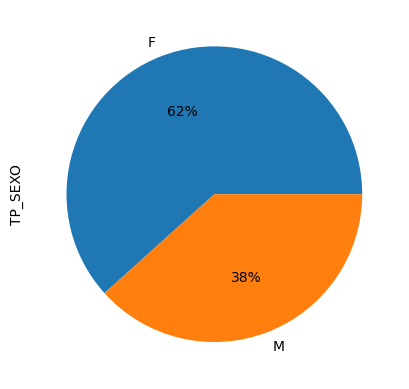

In [92]:
info_candidato['TP_SEXO'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* M - Masculino
* F - Feminino 

In [95]:
info_candidato['TP_SEXO'].value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

<Axes: ylabel='TP_ESTADO_CIVIL'>

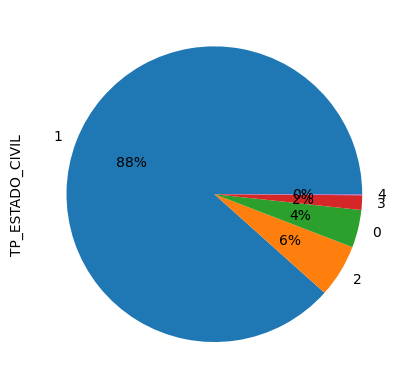

In [96]:
info_candidato['TP_ESTADO_CIVIL'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0	- Não informado
* 1	- Solteiro(a)
* 2	- Casado(a)/Mora com companheiro(a)
* 3	- Divorciado(a)/Desquitado(a)/Separado(a)
* 4	- Viúvo(a)

In [98]:
info_candidato['TP_ESTADO_CIVIL'].value_counts()

1    2995915
2     196285
0     139630
3      54141
4       3861
Name: TP_ESTADO_CIVIL, dtype: int64

<Axes: ylabel='TP_COR_RACA'>

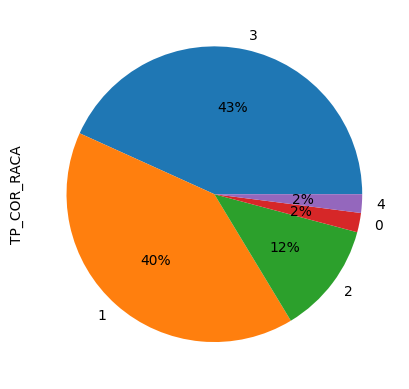

In [97]:
info_candidato['TP_COR_RACA'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não declarado
* 1 - Branca
* 2 - Preta
* 3 - Parda
* 4 - Amarela
* 5 - Indígena 
* 6 - Não dispõe da informação

In [99]:
info_candidato['TP_COR_RACA'].value_counts()

3    1457454
1    1362256
2     411302
0      71149
4      68491
5      19175
6          5
Name: TP_COR_RACA, dtype: int64

<Axes: ylabel='TP_NACIONALIDADE'>

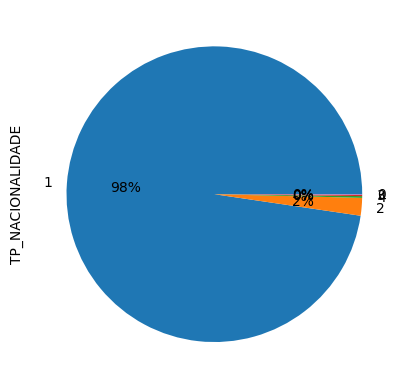

In [100]:
info_candidato['TP_NACIONALIDADE'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não informado
* 1 - Brasileiro(a)
* 2 - Brasileiro(a) Naturalizado(a)
* 3 - Estrangeiro(a)
* 4 - Brasileiro(a) Nato(a), nascido(a) no exterior

In [101]:
info_candidato['TP_NACIONALIDADE'].value_counts()

1    3310876
2      65525
4       6526
3       4562
0       2343
Name: TP_NACIONALIDADE, dtype: int64

<Axes: ylabel='TP_ESCOLA'>

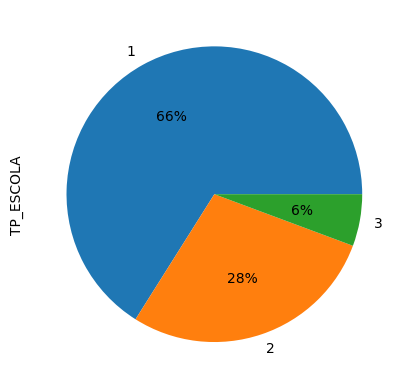

In [102]:
info_candidato['TP_ESCOLA'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 1 - Não Respondeu
* 2 - Pública
* 3 - Privada

In [103]:
info_candidato['TP_ESCOLA'].value_counts()

1    2238977
2     958611
3     192244
Name: TP_ESCOLA, dtype: int64

<Axes: ylabel='IN_TREINEIRO'>

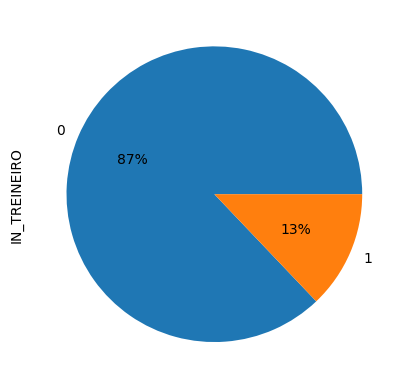

In [104]:
info_candidato['IN_TREINEIRO'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não é treineiro
* 1 - É treineiro

In [105]:
info_candidato['IN_TREINEIRO'].value_counts()

0    2952642
1     437190
Name: IN_TREINEIRO, dtype: int64